# Malaria Project

## Introduction 
##### Members
   Sebastian Schwarz
   Youssef Hantous

##### Project Description
The aim of this project is to study the distribution and evolution of anophenile vectors of Malaria in Africa. 
The dataset is a compilation of all available mosquito studies from 1898 to 2016. It was compiled in *Kyalo D, Amratia P, Mundia CW et al. A geo-coded inventory of anophelines in the Afrotropical Region south of the Sahara: 1898-2016*, published in 2017 with the help of the KEMRI-Wellcome Trust, in collaboration with many major research agencies on Malaria. 

This data should help better understand how malaria developped in the past century and what species are primarily associated with its expansion. 

We want to present this data in a clear fashion, showing trends in the evolution and the spread of anopheniles in Africa, and try to predict the future repartition of main malaria transmitting species. 


##### Data Source 
- Kaggle: https://www.kaggle.com/jboysen/malaria-mosquito 
- Dataverse: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/NQ6CUN

The paper describing how this dataset was compiled can be found here: https://wellcomeopenresearch.org/articles/2-57/v1 

##### Github Repository
- https://github.com/SebastianS09/Malaria (peut être pas) 


## Code
#### Data Import auditing and cleaning

In [5]:
import numpy as np 
import pandas as pd 

data_raw = pd.read_csv("https://raw.githubusercontent.com/SebastianS09/Malaria/master/Data/Malaria.csv")

print("The dataset has ",data_raw.shape[0],"rows and ",data_raw.shape[1],"columns")

data_raw.head(10)


The dataset has  13464 rows and  41 columns


,Country,GAUL_Admin1,GAUL_Admin2,Full_Name,Lat,Long,LatLong_Source,YeStart,YeEnd,An gambiae_complex,...,An rufipes,An coustani s.l,An ziemanni,An paludis,Adults/Larvae,Sampling_Methods,Species_Identification,Other sib species names,Other Anopheline species,Source_Title
0,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,NaN,NaN,NaN,NaN,"Adults, Larvae","HLC, HBC, LC",M,NaN,NaN,Ribeiro H & Ramos HC (1975). Research on the m...
1,Angola,Bengo,Dande,Boa Vista,-8.5990,13.5660,Encarta,1987,1987,Y,...,NaN,NaN,NaN,NaN,"Adults, Larvae","PSC, LC",M,NaN,NaN,Ramos L (1988). Memorandum sent to Director Ge...
2,Angola,Bengo,Dande,Cabungo,-8.5667,13.5000,Other,2002,2002,Y,...,NaN,NaN,NaN,NaN,Adults,"IR, Bednet traps","M, PCR",NaN,NaN,"Calzetta M, Santolamazza F, Carrara GC, Cani P..."
3,Angola,Bengo,Dande,Lifune,-8.4000,13.4490,Encarta,1970,1970,NaN,...,NaN,Y,Y,NaN,"Adults, Larvae","HLC, ABC, LC",M,NaN,NaN,Ribeiro H & Ramos HC (1975). Research on the m...
4,Angola,Bengo,Dembos,Dembos,-8.5156,14.5189,Google Earth,1940,1940,Y,...,NaN,NaN,NaN,NaN,Unknown,Unknown,M,NaN,NaN,De Mesquita B (1942). Considerações sobre o im...
5,Angola,Bengo,Icolo E Bengo,Bom Jesus,-9.1660,13.5660,Encarta,1952,1955,NaN,...,NaN,Y,Y,NaN,Adults,"IR, HLC",M,NaN,NaN,Gandara AF (1956). Subsido para o estude dos '...
6,Angola,Bengo,Icolo E Bengo,Icolo e Bengo,-9.2500,13.7333,Other,1940,1940,Y,...,NaN,NaN,NaN,NaN,Unknown,Unknown,M,NaN,NaN,Ribiero L (1942). Notas sobre aspectos nosogra...
7,Angola,Bengo,Icolo E Bengo,Kilunda,-8.9268,13.5878,Other,2001,2002,NaN,...,NaN,NaN,NaN,NaN,Adults,IR,"M, CBS",NaN,NaN,"Boccolini D, Carrara GC, Dia I, Fortes F, Cani..."
8,Angola,Bengo,Icolo E Bengo,Lagoa Banda,-8.8503,13.5842,Google Earth,1965,1965,Y,...,NaN,Y,Y,NaN,"Adults, Larvae","HLC, HBC, ABC, LC",M,NaN,NaN,Ribeiro H & Ramos HC (1975). Research on the m...
9,Angola,Bengo,Icolo E Bengo,Mazozo,-9.1020,13.6220,Encarta,1970,1970,Y,...,NaN,NaN,NaN,NaN,"Adults, Larvae","HLC, ABC, LC",M,NaN,NaN,Ribeiro H & Ramos HC (1975). Research on the m...


One observation of the data set is associated with one location, time and a source study. 
The location information is displayed as follows: 
- Country and Village name
- GAUL administrative regions (https://en.wikipedia.org/wiki/Global_Administrative_Unit_Layers) which are a unified spatial admnistrative unit system
- Geospatial coordinates and source

Each survey has a start and an end date. We will audit this in the next cell

There is supplementary information on the survey namely:
- Adults/Larvae: whether the survey was conducts on adults or larvae (live in water), sometimes unknown
- Sampling methods: how the speciemens where caught 
- Identification methods: how they were attributed to one species
- Other names and other species: if the species found also have other names and if they were other species present than the main 36 quoted
Details of the abreviations can be found here: https://github.com/SebastianS09/Malaria/blob/master/Data/Africa%20Vectors%20database_1898-2016_key.pdf

We will explore this supplementary information later

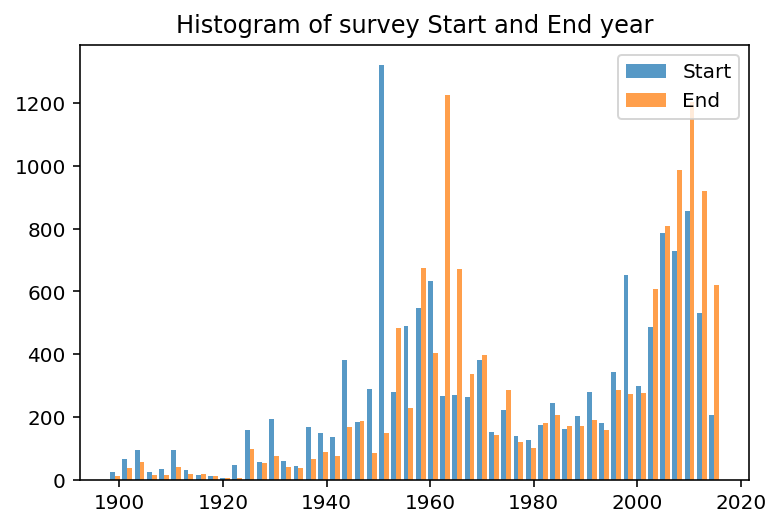

In [6]:
import matplotlib.pyplot as plt
#increasing size of graphs
plt.rcParams['figure.dpi'] = 72*2

dates = np.vstack([data_raw["YeStart"],data_raw["YeEnd"]]).T
plt.hist(dates,bins=50, alpha=0.75, label=['Start', 'End'])
plt.legend(loc='upper right')
plt.title("Histogram of survey Start and End year")
plt.show()

As we can see, most of the surveys have been executed around the 60s and in the late 2000s. 

However, the start year and the end year do not always coincide, meaning that the surveys may have been run on periods extending one year. Let us look into this with more detail. 

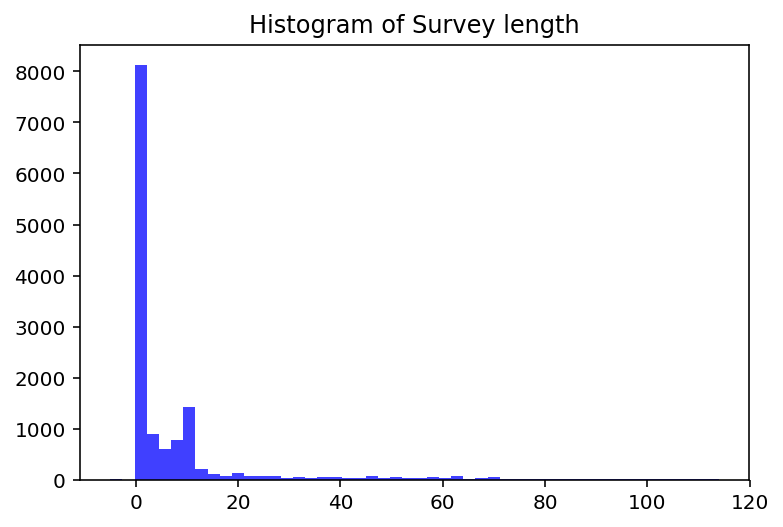

In [7]:
length = dates[:,1]-dates[:,0]
plt.hist(length, bins=50, facecolor="blue", alpha=0.75)
plt.title("Histogram of Survey length")
plt.show()

Most of the surveys have lasted for less than five years which seems reasonable. 
The fact that there is a non zero number of surveys lasting more than 20 years however is surprising. 
Let us look at this data and query the unique study titles associated to these long period surveys

In [8]:
long_survey = data_raw[["YeStart","YeEnd","Source_Title"]].query("YeEnd-YeStart>20")
pd.DataFrame(long_survey)

,YeStart,YeEnd,Source_Title
22,1963,2006,"Ribeiro H, Casaca VMR, Cochofel JALP (1964). A..."
30,1952,2005,Gandara AF (1956). Subsido para o estude dos '...
60,1940,2003,De Mesquita B (1942). Considerações sobre o im...
117,1940,2014,De Mesquita B (1942). Considerações sobre o im...
126,1940,2014,De Mesquita B (1942). Considerações sobre o im...
154,1967,2001,Ribeiro H & Ramos HC (1975). Research on the m...
164,1912,2003,Sant'Anna JF (1920). Anofelíneos de Portugal e...
181,1983,2006,Ceita JGV (1988). Relatorio de missao sobre a ...
199,1970,2002,Ribeiro H & Ramos HC (1975). Research on the m...
208,1970,2003,Ribeiro H & Ramos HC (1975). Research on the m...


In [9]:
pd.DataFrame(long_survey["Source_Title"].value_counts().sort_values(ascending = False))

,Source_Title
"Sogoba N, Vounatsou P, Bagayoko MM, Doumbia S, Dolo G, Gosoniu L, Traore SF, Toure YT, Smith T (2007). The spatial distribution of Anopheles gambiae sensu strict and An. arabiensis (Diptera: Culicidae) in Mali. Geospatial Health 2, 213-307; Sogoba N, Vounatsou P, Bagayoko MM, Doumbia S, Dolo G, Gosoniu L, Traoré SF, Smith TA, Touré YT (2008). Spatial distribution of the chromosomal forms of anopheles gambiae in Mali. Malaria Journal, 7:257; digitized occurennce and compared with actual data to idenfify those likely missed from formal search",22
"Lewis DJ (1945). Observations on the distribution and taxonomy of Culicidae (Diptera) in the Sudan. Transactions of the Royal Entomological Society of London, 95: 1-26; Lewis DJ (1956). The anopheline mosquitoes of Sudan. Bulletin of Entomological Research, 47: 475-494",14
"Lewis DJ (1956). The anopheline mosquitoes of Sudan. Bulletin of Entomological Research, 47: 475-494; Digitized from map shown in Figure 9, page 489 Google Earth to nearest towns; Awad F & Mohamed Ismail S (2015). The malaria situation in Sudan. Presentation at EMRO 11th Regional Meeting, Amman, Jordon, 22nd November 2015; Points digitized from map and names of the places estimated in Google Earth",10
"Lewis DJ (1945). Observations on the distribution and taxonomy of Culicidae (Diptera) in the Sudan. Transactions of the Royal Entomological Society of London, 95: 1-26; Lewis DJ (1956). The anopheline mosquitoes of Sudan. Bulletin of Entomological Research, 47: 475-494; Digitized from map shown in Figure 9, page 489 Google Earth to nearest towns",6
"Mourão MC (1964). Relatório da Missão de estudo e combate de endemias de São Tomé e Principe (1º semestre de 1962). Anais do Instituto de Medicina Tropical, 21: 501-539; Pinto J, Sousa CA, Gil V, Ferreira C, Gonçalves L, Lopes D, Petrarca V, Charlwood JD, do Rosário VE (2000). Malaria in São Tomé and Príncipe: parasite prevalences and vector densities. Acta Tropica, 76: 185-193",4
"de Meillon B (1941). Estudos entomológicos da colónia de Moçambique : Relatório acerca dos vectores do paludismo em algumas partes da África Oriental Portuguesa, com sugestoes para o seu combate. Lourenço Marques : Imprensa Nacional de Moçambique, pp. 313; de Meillon B & Pereira MC (1940). Notes on some anophelines (Dipt. Culicidae) from Portuguese East Africa. Moçambique-Documentário Trimestral, 23: 69-107; Soeiro AN (1952). O sezonismo em Moçambique : contribuição para o estudo epidemiológico. Anais do Instituto de Medicina Tropical, 9: 343-389; op cit report by de Meillon B & Pereira MC (1940); Petrarca V, Carrara GC, Di Deco MA, Petrangeli G (1984). Osservazioni citogenetiche e biometriche sui membri del complesso Anopheles gambiae in Mozambico. Parassitologia, 26: 247-259",4
"Laveran MA (1904). Anopheles et paludisme a Madagascar. Prophylaxie du paludisme. Bulletin de l'Academie de Medecine, 52: 197-218; Grjebine A (1966). Faune de Madagascar XXII. Insectes Dipteres Culicidae Anophelinae. ORSTOM Paris, 487 pp.; assembly of previous survey data by Institute Pasteur & Others",4
"Mourão MC (1964). Relatório da Missão de estudo e combate de endemias de São Tomé e Principe (1º semestre de 1962). Anais do Instituto de Medicina Tropical, 21: 501-539; Ribeiro H, Ramos HC, Pires CA (1988). Sobre os vectores da malária em São Tomé e Principe. Garcia de Orta, Série de Zoologia, 15: 135-152; Pinto J, Sousa CA, Gil V, Ferreira C, Gonçalves L, Lopes D, Petrarca V, Charlwood JD, do Rosário VE (2000). Malaria in São Tomé and Príncipe: parasite prevalences and vector densities. Acta Tropica, 76: 185-193",3
"Choumara R (1961). Notes on Malaria in Somaliland. World Health Organization, Somaliland. WHO Archive, Geneva; digitized using google earth to nearest settlement; WHO Somalia (2007). Entomology Statistics, RBM Programme, WHO, Somalia, unpublished reports",3
"Maffi M (1960). Malaria in the Regions of Mudugh and Migiurtinia, Somalia. Journal of Malariology, 39: 21-118; Diallo M, Amran J, Ali

Looking at this summary data, it seems that republication dates have sometimes be taken into account as end dates (see Hamon J studies for example). 

**Moving forward, we will therefore use the start date as the reference date.** We would suggest auditing these long period cases for the sake of the datasets integrity, even if it does not affect us very much here.

Let us move forward and clean the data to only keep the rows we need in our anlaysis. 

##### Removing unecessary geographical precision and study information

In [24]:
data_raw.columns = [i.replace(' ', '_') for i in data_raw.columns]
data_raw.columns = [c.replace('.', '_') for c in data_raw.columns]
col_rm = ['GAUL_Admin2','Full_Name','LatLong_Source','Source_Title']
data_rm = data_raw.drop(col_rm, axis=1)

##### Cleaning Adults/Larvae field for Case

We notice that we have an occurence of Adults/larvae with a minuscule which we want to clean

In [11]:
data_raw["Adults/Larvae"] = data_raw["Adults/Larvae"].replace("Adults, larvae","Adults, Larvae")

##### Replacing Y and NaN with 0 and 1 for ease of understanding (col 7 to 33)
As we can see, the presence of an anophenile is encoded in columns holding the species' names, with "Yes" if it is present and "NaN" otherwise. 
We will replace these values to 0 and 1 to be able to perform mathematical operations on the columns

In [12]:
data_clean = data_rm.copy()

ano = list(data_clean)[6:32]
data_clean[ano] = data_clean[ano].replace(['Y'],1)
data_clean[ano] = data_clean[ano].fillna(0)

data_clean.head(10)

,Country,GAUL_Admin1,Lat,Long,YeStart,YeEnd,An_gambiae_complex,An_gambiae_ss,SS_M_Form_(An_colluzzi_or_Mopti_forms),SS_S_Form_(savanah_or_Bamako_forms),...,An_wellcomei,An_rufipes,An_coustani_s.l,An_ziemanni_,An_paludis_,Adults/Larvae,Sampling_Methods,Species_Identification,Other_sib_species_names,Other_Anopheline_species
0,Angola,Bengo,-8.4730,13.3620,1967,1967,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,"Adults, Larvae","HLC, HBC, LC",M,NaN,NaN
1,Angola,Bengo,-8.5990,13.5660,1987,1987,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,"Adults, Larvae","PSC, LC",M,NaN,NaN
2,Angola,Bengo,-8.5667,13.5000,2002,2002,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Adults,"IR, Bednet traps","M, PCR",NaN,NaN
3,Angola,Bengo,-8.4000,13.4490,1970,1970,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,"Adults, Larvae","HLC, ABC, LC",M,NaN,NaN
4,Angola,Bengo,-8.5156,14.5189,1940,1940,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,M,NaN,NaN
5,Angola,Bengo,-9.1660,13.5660,1952,1955,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,Adults,"IR, HLC",M,NaN,NaN
6,Angola,Bengo,-9.2500,13.7333,1940,1940,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,M,NaN,NaN
7,Angola,Bengo,-8.9268,13.5878,2001,2002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Adults,IR,"M, CBS",NaN,NaN
8,Angola,Bengo,-8.8503,13.5842,1965,1965,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,"Adults, Larvae","HLC, HBC, ABC, LC",M,NaN,NaN
9,Angola,Bengo,-9.1020,13.6220,1970,1970,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,"Adults, Larvae","HLC, ABC, LC",M,NaN,NaN


In [13]:
data_clean.describe(include="all")

,Country,GAUL_Admin1,Lat,Long,YeStart,YeEnd,An_gambiae_complex,An_gambiae_ss,SS_M_Form_(An_colluzzi_or_Mopti_forms),SS_S_Form_(savanah_or_Bamako_forms),...,An_wellcomei,An_rufipes,An_coustani_s.l,An_ziemanni_,An_paludis_,Adults/Larvae,Sampling_Methods,Species_Identification,Other_sib_species_names,Other_Anopheline_species
count,13464,13364,13330.000000,13330.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,...,13464.000000,13464.000000,13464.000000,13464.000000,13464.000000,13464,13464,13464,259,3118
unique,48,543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,940,76,69,816
top,Madagascar,Nyanza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Adults, Larvae",LC,M,M/S hybrid,An pretoriensis
freq,1274,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5597,1829,7081,29,212
mean,NaN,NaN,1.180477,19.948668,1974.798500,1982.053105,0.861260,0.296346,0.098856,0.116979,...,0.020202,0.074198,0.199941,0.049242,0.027926,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,11.783243,20.642544,28.171339,26.196835,0.345688,0.456662,0.298480,0.321407,...,0.140696,0.262102,0.399970,0.216382,0.164768,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,-34.299700,-25.107200,1898.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,-5.644775,1.014475,1952.000000,1962.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.774750,27.341300,1972.000000,1984.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,10.657750,36.915450,2003.000000,2007.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


##### Editing Other Species
We see that we have other species not mentionned in the column names in the last column. Let us check if they are relevant (in terms of frequency vs. species with dedicated columns):

In [14]:
#splitting the last column as the additional are comma separated
other_f = data_clean['Other_Anopheline_species'].str.split(', ', expand=True)
other_f.fillna(0,inplace=True)

#counting the occurence in each new column
a = other_f[0].value_counts().to_frame()
for i in list(other_f.drop(0,axis=1)):
    a = a.join(other_f[i].value_counts().to_frame())
a.fillna(0,inplace=True)

#summing the columns up to have a definite count
pd.DataFrame(a.sum(axis=1).sort_values(ascending = False)[1:,])

,0
An pretoriensis,535.0
An maculipalpis,413.0
An d'thali,315.0
An obscurus,270.0
An rhodesiensis,265.0
An pauliani,255.0
An demeilloni,203.0
An cydippis,187.0
An christyi,186.0
An flavicosta,173.0


In [15]:
pd.DataFrame(data_clean[ano].sum(axis=0).sort_values(ascending = False))

,0
An_gambiae_complex,11596.0
An_funestus__s.l,5095.0
An_gambiae_ss,3990.0
An_arabiensis,3648.0
An_coustani_s.l,2692.0
An_pharoensis,1902.0
SS_S_Form_(savanah_or_Bamako_forms),1575.0
SS_M_Form_(An_colluzzi_or_Mopti_forms),1331.0
An_squamous,1294.0
An_rufipes,999.0


As we can see, there are quite high occuring species in "Others". they would rank above An Mouscheti in the primary vector classification. 

However, and as stated in the abstract, the classification has not be done exclusively on occurence. According to the authors of the dataset, *"The definition of secondary vectors is complex and often site/time specific"* We refer to the paper for further information but the main point is that secondary vectors do not transmit paludism to humans, or in very rare cases. 

For the sake of the exercise and reflecting information of this databse of anopheniles: http://bioinfo-web.mpl.ird.fr/identiciels/anopheles/html/taxa/pretoriensis_A_.html, we will add  An Pretoriensis to the primary vectors as they have been transmitting fever generating arboviruses in Nigeria

In [16]:
An_pretoriensis = data_clean["Other_Anopheline_species"].str.contains("An pretoriensis").fillna(0)*1
data_clean.insert(32,"An_pretoriensis",An_pretoriensis)


#### MetaData analysis
Let us explore the metadata associated to the records which is:
- Adults/Larvae
- Sampling_Methods
- Species_Identification

We will start with some quick summarizing and plotting

##### Species type survey Attributes in time and Space

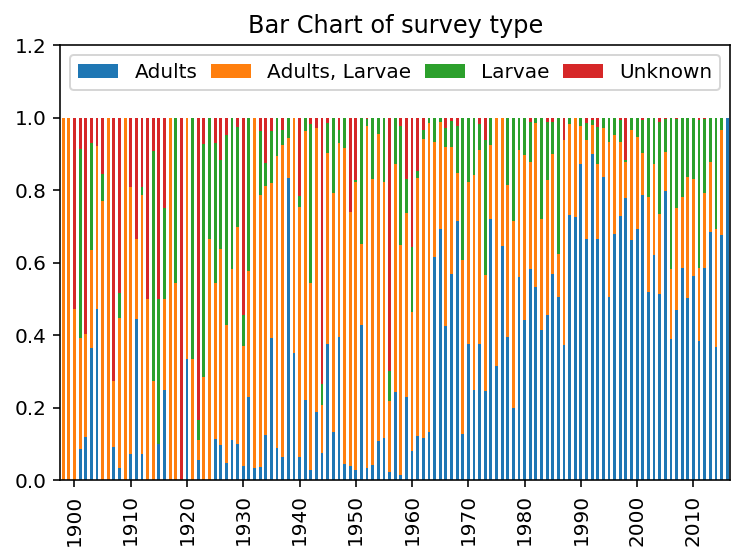

In [20]:
import plotly.plotly as py

AL = data_raw[["YeStart","Adults/Larvae"]]
AL_pivot = AL.reset_index().pivot_table(index = "YeStart", columns = "Adults/Larvae",aggfunc=lambda x: len(x.unique())).fillna(0)
AL_pivot.columns = AL_pivot.columns.droplevel()

x = AL_pivot.index.values
y = np.vstack(AL_pivot[i] for i in AL_pivot.columns)
y_norm = (y/y.sum(axis=0))
lbs = list(AL_pivot)

test = pd.DataFrame(y_norm.T,columns=lbs)
test.index = x
test.plot.bar(stacked = True)

#ax = plt.subplot(111)
#ax.bar(x-0.2, y[0],width=0.1,color='b',align='center', label = AL_pivot.columns[0])
#ax.bar(x-0.1, y[1],width=0.1,color='g',align='center',label = AL_pivot.columns[1])
#ax.bar(x+0.1, y[2],width=0.1,color='r',align='center',label = AL_pivot.columns[2])
#ax.bar(x+0.2, y[3],width=0.1,color='y',align='center',label = AL_pivot.columns[3])

ax = plt.gca() 
ax.set_xticks(range(2,120,10))
ax.set_xticklabels(range(1900,2020,10))

plt.legend(loc='upper left',ncol=4, mode="expand")
plt.title("Bar Chart of survey type")
plt.ylim(ymax = 1.2, ymin = 0)
plt.show()

It appears that over time, surveys focused in particular on Adults but also Larvae are prefered over mixed surveys. This makes sense as it must be easier to distinguish species and to make more accurate surveys. 
Also, Unknown survey tend to diminish over time, due to better reporting

Let us check if there is a geographical influence:

In [18]:
#function to calculate breaks in a sorted daataframe
def get_lim(df,col):
    val=df[col].unique()
    temp = []
    temp_s = [0]
    out = []
    for i in range(0,len(val)):
        temp.append(len(df[df[col]==val[i]]))
    for i in range(0,len(val)):
        temp_s.append(sum(temp[0:i+1]))
    for i in range(0,len(val)):
        out.append((temp_s[i],temp_s[i+1]))
    return(out)    

#function to generate colormaps

import colorsys

def get_N_HexCol(N=5):
    HSV_tuples = [(x * 1.0 / N, 0.9, 0.9) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        hex_out.append('#%02x%02x%02x' % tuple(rgb))
    return hex_out

['#e51616', '#bce516', '#16e569', '#1669e5', '#bc16e5']

In [21]:
AL_G = data_raw[data_raw["YeStart"]>1960][["Adults/Larvae","Lat","Long"]]
AL_G = AL_G.sort_values(["Adults/Larvae"])

limits = get_lim(AL_G,"Adults/Larvae")
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)"]
cities = []
names=lbs

for i in range(len(limits)):
    lim = limits[i]
    df_sub = AL_G[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'africa',
        lon = df_sub['Long'],
        lat = df_sub['Lat'],
#       text = df_sub['text'],
        marker = dict(
         #   size = df_sub['pop']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        #name = '{0} - {1}'.format(lim[0],lim[1]) )
        name=names[i] )

        
    cities.append(city)

    
layout = dict(
        title = 'Distribution de la Malaria au fil des années',
        showlegend = True,
        geo = dict(
            scope='africa',
            projection=dict( type='africa' ),
            showland = True,
            landcolor = 'rgb(185, 185, 185)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(200, 200, 200)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='bubble-map-populations' )

From a Geographical perspective, there appears to be no particular preference of survey type since the sixties. 
Plotting before the sixties show that surveys conducted in central Africa tend to have more Unknowns. 


##### Sampling Methods

Let us compute the top 10 sampling methods

Here the abreviations as a reminder:

<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>Abreviation</th><th>Description</th></tr></thead><tbody>
 <tr><td>ABC</td><td>Animal Bait Catches</td></tr>
 <tr><td>Bednet traps</td><td>Bed net traps</td></tr>
 <tr><td>CDC Light traps</td><td>CDC light traps</td></tr>
 <tr><td>HBC/NBC</td><td>Human/Night Bait Catches (may be witnin a double sided net)</td></tr>
 <tr><td>HLC</td><td>Human Landing Catches </td></tr>
 <tr><td>NBC</td><td>Night Bait Catches</td></tr>
 <tr><td>IR</td><td>Indoor resting (Often written as room searches, aspirators or hand catches indoors)</td></tr>
 <tr><td>OS</td><td>Outdoor sampling</td></tr>
 <tr><td>LC</td><td>Larval Collections</td></tr>
 <tr><td>Exit traps</td><td>Exit traps</td></tr>
 <tr><td>PSC </td><td>Pyrethrum Spray Catches</td></tr>
 <tr><td>ITT </td><td>Ifakara Tent Traps</td></tr>
</tbody></table>

In [ ]:
top_methods = pd.DataFrame(pd.Series(' '.join(data_clean['Sampling_Methods']+",").split(", ")).value_counts()[:10], columns = ["Count"])

#let us check the evolution of the top 3 cathing methods over time 

M0 = data_clean[data_clean['Sampling_Methods'].str.match(top_methods.index[0])]["YeStart"]
M1 = data_clean[data_clean['Sampling_Methods'].str.match(top_methods.index[1])]["YeStart"]
M2 = data_clean[data_clean['Sampling_Methods'].str.match(top_methods.index[2])]["YeStart"]
MU = data_clean[data_clean['Sampling_Methods'].str.match("Unknown")]["YeStart"]


M0v = M0.value_counts()
M1v = M1.value_counts()
M2v = M2.value_counts()
MUv = MU.value_counts()

conc = pd.concat([M0v,M1v,M2v,MUv],axis=1)
conc.columns=[top_methods.index[[0,1,2,4]]]
conc.plot.bar(stacked=True)

ax = plt.gca() 
ax.set_xticks(range(2,120,10))
ax.set_xticklabels(range(1900,2020,10))
plt.title("Bar Chart of collection method")
plt.ylim(ymax = 300, ymin = 0)
plt.show()

We observe a diminution of "Unknown" methods over time, again due to better accountability

Larval collection is on the rise in the 2000s, after having been used in the 50s and the 60s
In-house capture seems to be the more and more used (makes sense as the propagation of malaria is mainly due to anopheniles that attack humans inside their houses)

However, there is a prevalence of mixed methods: 

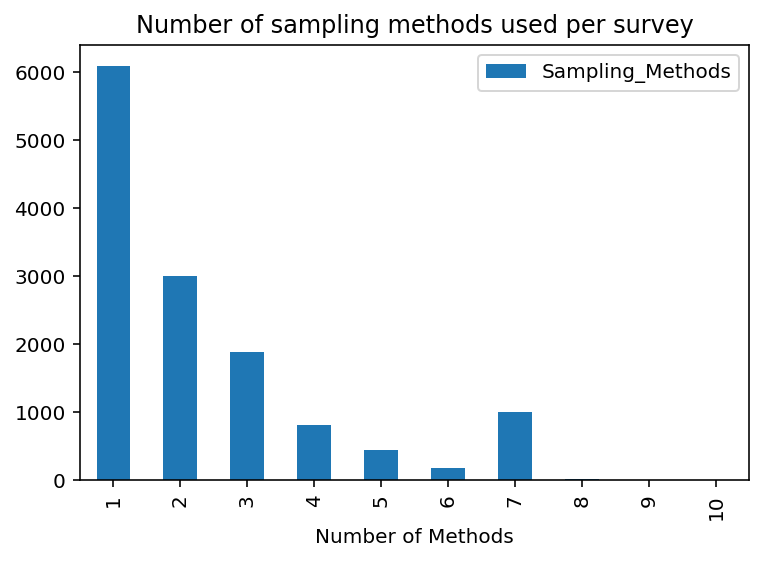

In [23]:
multiple_occ = pd.DataFrame([data_clean["Sampling_Methods"],data_clean["Sampling_Methods"].str.count(", ")+1]).T

multiple_occ.columns = ["Sampling_Methods","Number of Methods"]
multiple_occ.groupby(["Number of Methods"]).count().plot.bar()
plt.title("Number of sampling methods used per survey")
plt.show()



As we can see, more than half the surveys are using at least two methods. 

##### Focus on species indentification

Let us see now how species have been identified. As a reminder, the list of abreviations: 

<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>Species ID method</th><th>Description</th></tr></thead><tbody>
 <tr><td>CBS</td><td>Chromosone Banding </td></tr>
 <tr><td>DNA</td><td>Sequencing DNA probes</td></tr>
 <tr><td>M </td><td>Morphology</td></tr>
 <tr><td>PCR</td><td>Polymerase Chain Reaction</td></tr>
</tbody></table>

We have only four methods, but a combination of methods can be used: 



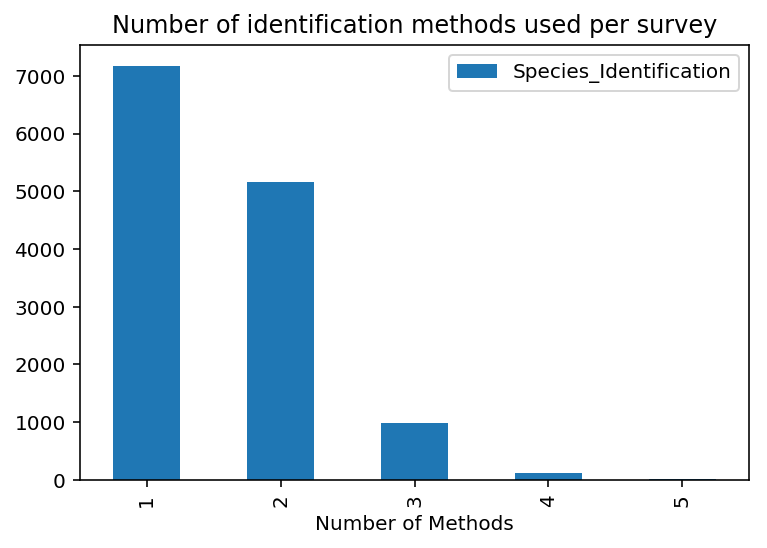

In [22]:
multiple_id = pd.DataFrame([data_clean["Species_Identification"],data_clean["Species_Identification"].str.count(", ")+1]).T

multiple_id.columns = ["Species_Identification","Number of Methods"]
multiple_id.groupby(["Number of Methods"]).count().plot.bar()
plt.title("Number of identification methods used per survey")
plt.show()

Again, roughly half the surveys have at least two id methods. 

Does this change over time ?

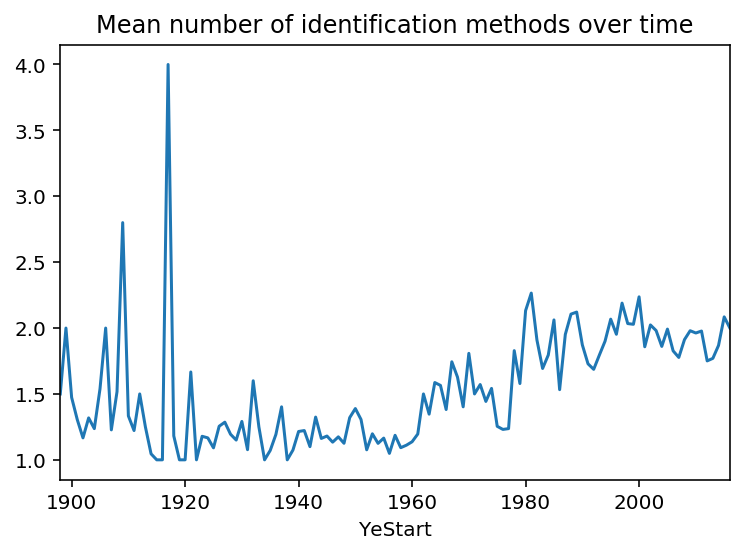

In [25]:
mean_id = pd.DataFrame([data_clean["YeStart"],data_clean["Species_Identification"].str.count(", ")+1]).T
mean_id.columns = ["YeStart","Number of Methods"]
mean_id.groupby(["YeStart"])["Number of Methods"].mean().plot()
plt.title("Mean number of identification methods over time")
plt.show()


We see a slight positive trend from 1 to 2 identification methods between 1960 and 2000. Between 1900 and 1930, there is quite a high volatility in the number of methods used. The value in 1918 is surprising as DNA sequencing was not available at this point (starts in the 80s as we can see on the graph)

**Further inspection on these surprising data points**

In [26]:
early_dna  = pd.DataFrame([data_clean["YeStart"],data_clean["Species_Identification"],data_clean["Species_Identification"].str.count(", ")+1,data_raw["Source_Title"]]).T
early_dna.columns= ["YeStart","Species_Identification","Count","Source_Title"]
early_dna[(early_dna["Species_Identification"].str.contains("DNA")) & (early_dna["YeStart"]<1950)].sort_values("YeStart")


,YeStart,Species_Identification,Count,Source_Title
10497,1899,"M, DNA, PCR",3,"Ross R, Annett HE, Austen EE (1902). Report of..."
5829,1900,"M, DNA, PCR",3,Kumm HW (1929). The geographical distribution ...
4871,1900,"M, DNA, PCR",3,Kumm HW (1929). The geographical distribution ...
5012,1900,"M, DNA, PCR",3,Christophers SR & Stephens JWW (1900). Further...
5747,1900,"M, DNA, PCR",3,Kumm HW (1929). The geographical distribution ...
4694,1901,"M, DNA, PCR",3,Dutton JE & Theobald FV (1902). Report of the ...
3442,1903,"M, DNA, PCR",3,Kumm HW (1929). The geographical distribution ...
6851,1903,"M, CBS, DNA, PCR",4,Laveran MA (1904). Anopheles et paludisme a Ma...
7329,1904,"M, CBS, DNA, PCR",4,Laveran MA (1904). Anopheles et paludisme a Ma...
10178,1905,"M, DNA",2,Le Moal (1906). Étude sur les Moustiques en Af...


There appears to be a limited number of studies mentionning DNA as a source before the 50s. 
This would be worth having a look into, and determining what exactly was ment. 

Here is the list of the studies: 

In [27]:
values_early_dna = early_dna[(early_dna["Species_Identification"].str.contains("DNA")) & (early_dna["YeStart"]<1940)].sort_values("YeStart")

values_early_dna["Source_Title"].str.slice(0,50).value_counts()

Kumm HW (1929). The geographical distribution of t    13
Symes CB (1931). Descriptions of fourth stage larv     3
Laveran MA (1904). Anopheles et paludisme a Madaga     2
Simpson JJ (1912). Entomological research in Briti     2
Le Moal (1906). Étude sur les Moustiques en Afriqu     2
Sant'Anna JF (1920). Anofelíneos de Portugal e Col     2
Simpson JJ (1916). Entomological Research in Briti     2
Evans AM & Symes CB (1937). Anopheles funestus and     2
Ingram A & de Meillon B (1929). A mosquito survey      2
Gibbins EG (1932). Natural Malaria Infection of Ho     2
Leeson HS (1937). The mosquitoes of the funestus s     1
Gibbins EG (1933). The domestic Anopheles mosquito     1
Sautet J, Marneffe H (1955). Paludisme. Médecine T     1
Simpson JJ (1913). Entomological research in Briti     1
de Meillon B (1941). Estudos entomológicos da coló     1
Dutton JE & Theobald FV (1902). Report of the mala     1
Mills RC (1932). Annual Medical and Sanitary Repor     1
Gordon RM, Hicks EP, Davey TH, 

These studies would be worth looking into, in particular Kumm HW and Symes CB as they account for 16 of the occurences. 

Let us check now what method is the prefered method when only one is chosen:

In [28]:
single_id = pd.DataFrame([data_clean["Species_Identification"],data_clean["Species_Identification"].str.count(", ")+1]).T
single_id.columns = ["Species_Identification","Number of Methods"]
single_id_out = single_id[single_id["Number of Methods"] == 1]
single_id_out.groupby(["Species_Identification"]).sum()


,Number of Methods
Species_Identification,
M,7081
M,94
Unknown,1


Every time a single method has been used (roughly 50% of studies), it was a morphological analysis. 

As such, it is confirmed that other methods come on top to validate this morphological approach. 

Let us check the percent of single morphological studies over time: 

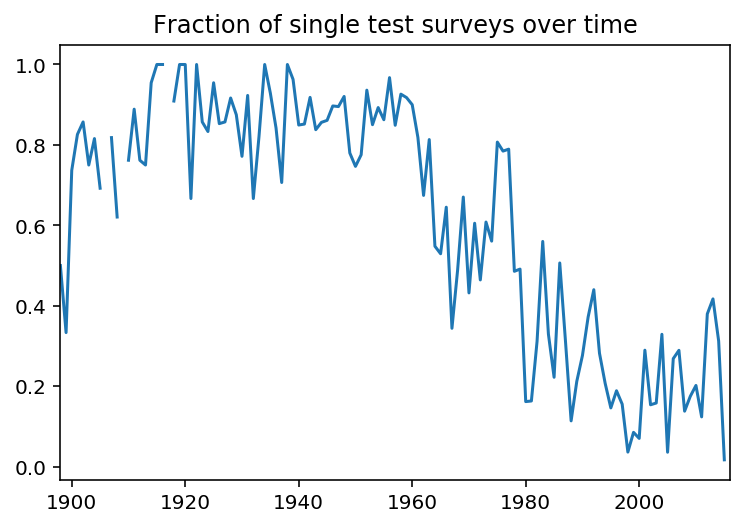

In [29]:
single_id = pd.DataFrame([data_clean["YeStart"],data_clean["Species_Identification"],data_clean["Species_Identification"].str.count(", ")+1]).T
single_id.columns = ["YeStart","Species_Identification","Number of Methods"]
single_id_out = single_id[single_id["Number of Methods"] == 1]

single_count = single_id_out.groupby(["YeStart"]).sum()["Number of Methods"]
total_count = data_clean["YeStart"].value_counts()

out = pd.concat([single_count,total_count],axis=1)
out.columns = ["single","total"]

out_p = out.single/out.total
out_p.plot()
plt.title("Fraction of single test surveys over time")
plt.show()

The trend is clearly decreasing, indicating that as time goes by, scientist have been more and more using multiple methods to identify anophenile vectore in Africa. 

Let us have a look at the geography of the identification methods, to see, again if there is a preference. 

In [30]:
M_G = data_raw[data_raw["YeStart"]>1960][["Species_Identification","Lat","Long"]]

M_G = M_G.sort_values(["Species_Identification"])
M_G_s = M_G.copy()
M_G_s.Species_Identification = M_G.Species_Identification.str.strip("M, ")

M_G_s = pd.concat([M_G_s,M_G_s.Species_Identification.str.count(", ")+1],axis=1)

M_G_s.columns = ["Id","Lat","Long","Count"]
M_G_s.Id.replace("","M",inplace=True)

M_G_plot = M_G_s[M_G_s["Count"]<2][["Id","Lat","Long"]]
M_G_plot = M_G_plot.sort_values(["Id"])
M_G_plot = M_G_plot[M_G_plot.Id.isin(M_G_plot.Id.value_counts().index[M_G_plot.Id.value_counts()>10].values)]


limits = get_lim(M_G_plot,"Id")
colors = get_N_HexCol(len(limits))
cities = []
names= M_G_plot.Id.value_counts().index[M_G_plot.Id.value_counts()>10].values

for i in range(len(limits)):
    lim = limits[i]
    df_sub = AL_G[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'africa',
        lon = df_sub['Long'],
        lat = df_sub['Lat'],
        marker = dict(
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name=names[i] )

        
    cities.append(city)

    
layout = dict(
        title = 'Identification methods of anophenile vectore after 1960',
        showlegend = True,
        geo = dict(
            scope='africa',
            projection=dict( type='africa' ),
            showland = True,
            landcolor = 'rgb(185, 185, 185)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(200, 200, 200)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot(fig, validate=False, filename='bubble-map-populations')

This is quite interesting as it appears some methods have been used very locally, such as the XXX method. 
Other methods seem to be in use all over Africa with a small number of marginal methods (less than 10 occurences). 

#### Data inspection tools

As a second step we will write some tools (functions), that will allow us to inspect parts of the data, in particular to extract records of the dataset and to present them in a new and interesting fashion

- function to get all the mosquitos associated to a country and a time frame
- function to get all the records near a given point of interest 
- function to XXX

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Nairobi")
print((location.latitude, location.longitude))